In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Data description:


* **Trip_distance:** The elapsed trip distance in miles reported by the taximeter.


* **Rate_code:** The final rate code is in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark, 4=Nassau or Westchester, 5=Negotiated fare,6=Group ride


* **Storeandfwd_flag:** This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor and determines if the trip was stored in the server and forwarded to the vendor. Y= store and forward trip N= not a store and forward trip


* **Payment_type:** A numeric code signifying how the passenger paid for the trip. 1= Credit card,2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip


* **Fare_amount:** The time-and-distance fare calculated by the meter


* **Extra:** Miscellaneous extras and surcharges.


* **Mta_tax:** $0.50 MTA tax that is automatically triggered based on the metered rate in use.


* **Tip_amount:** Tip amount credited to the driver for credit card transactions.


* **Tolls_amount:** Total amount of all tolls paid in the trip.


* **Imp_surcharge:** $0.30 extra charges added automatically to all rides


* **Total_amount:** The total amount charged to passengers. Does not include cash tips


* **Pickuplocationid:** TLC Taxi Zone in which the taximeter was engaged


* **Dropofflocationid:** TLC Taxi Zone in which the taximeter was disengaged


* **Year:** The year in which the taxi trip was taken.


* **Month:** The month on which the taxi trip was taken.


* **Day:** The day on which the taxi trip was taken.


* **Day_of_week:** The day of the week on which the taxi trip was taken


* **Hour_of_day:** Used to determine the hour of the day in 24 hours format


* **Trip_duration:** The total duration of the trip in seconds


* **calculated_total_amount:** The total amount the customer has to pay for the taxi.

## Problem Statement


This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.



Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

In [2]:
train = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\train.csv")
test =  pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\test.csv")
submission = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\submission.csv")

In [3]:
pd.set_option("display.max_columns",100)
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


# EDA 

## Univariate Analaysis

In [4]:
# Lets combine the Data

combined = pd.concat([train, test], ignore_index = True)

In [5]:
print("Shape of the Data:---> ",combined.shape)

Shape of the Data:--->  (50000, 20)


In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  int64  
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  int64  
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  float64
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  float64
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

In [7]:
num_cols = combined.select_dtypes(include=np.number).columns

In [8]:
num_cols

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

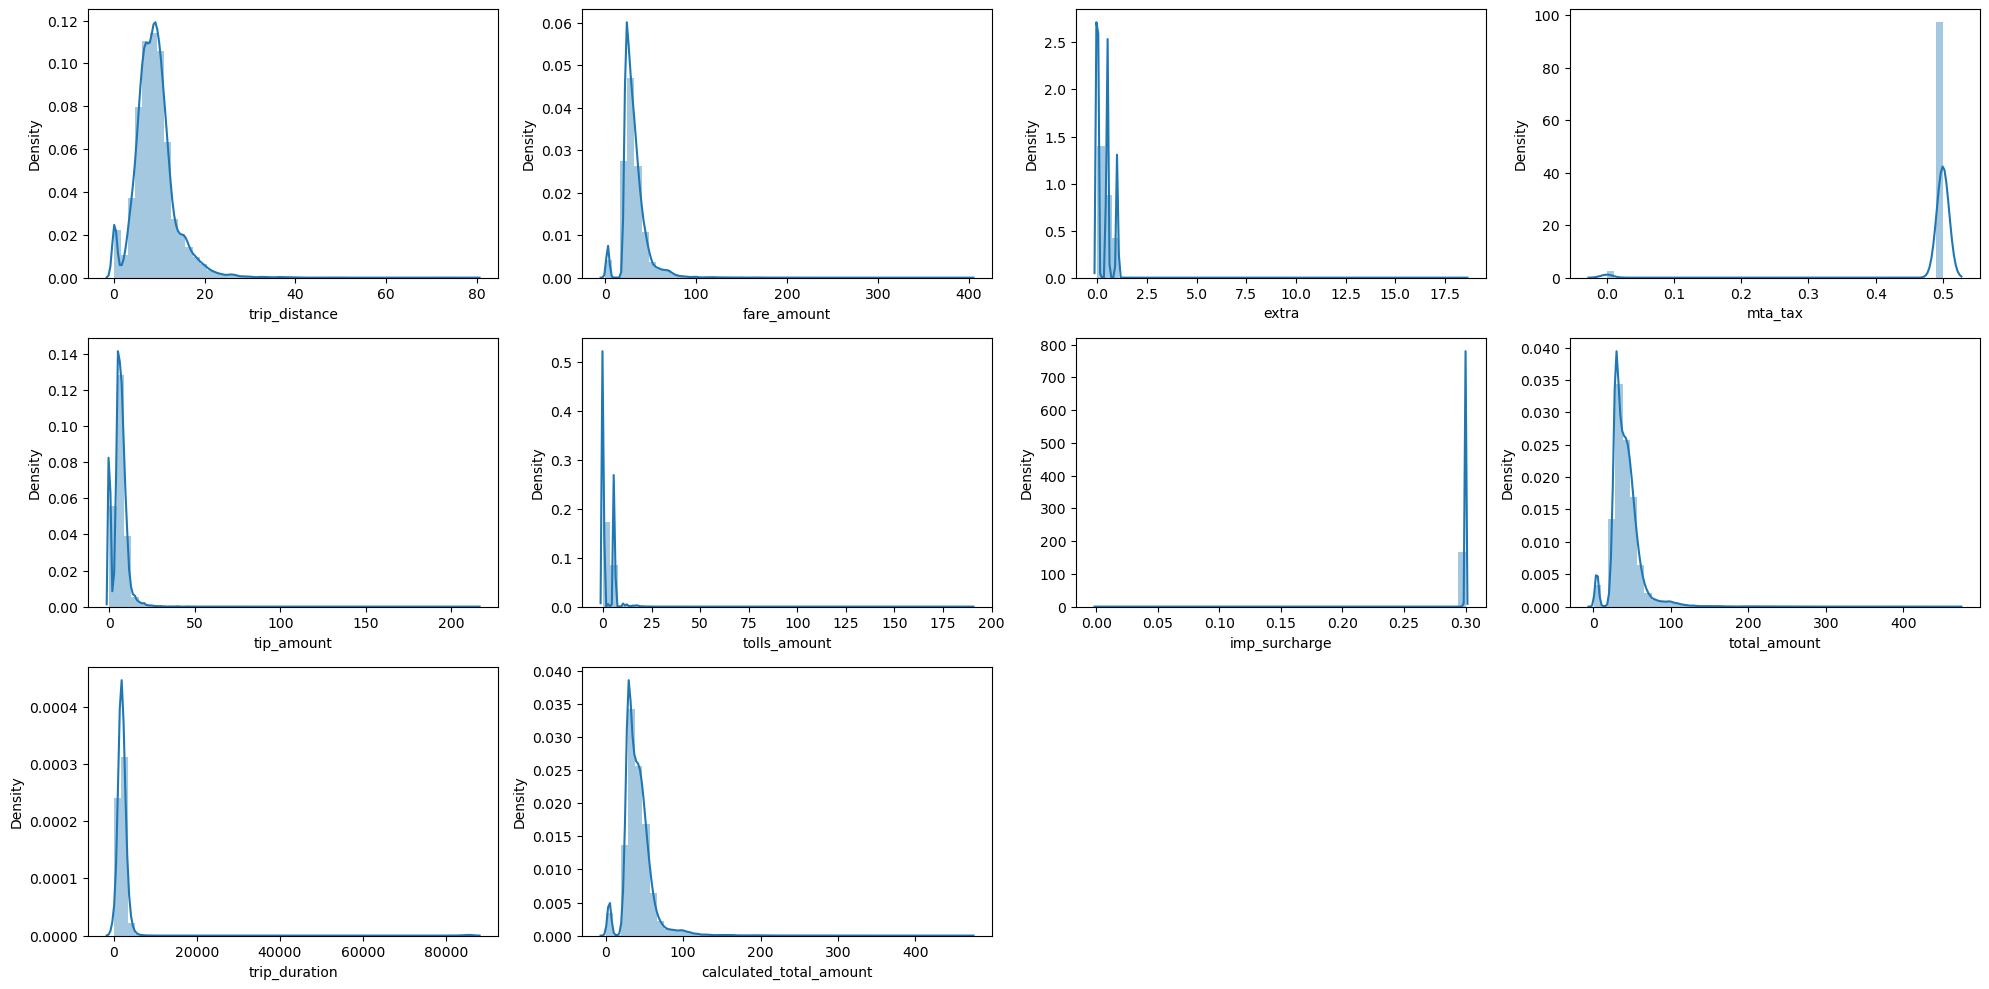

In [9]:
numeric_cols = ['trip_distance','fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount','trip_duration','calculated_total_amount']

nrows = 3
ncols = 4
iterator = 1

plt.figure(figsize=(20,10))
for i in numeric_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(combined.loc[:,i])
    iterator+=1
    
plt.tight_layout()
plt.show()

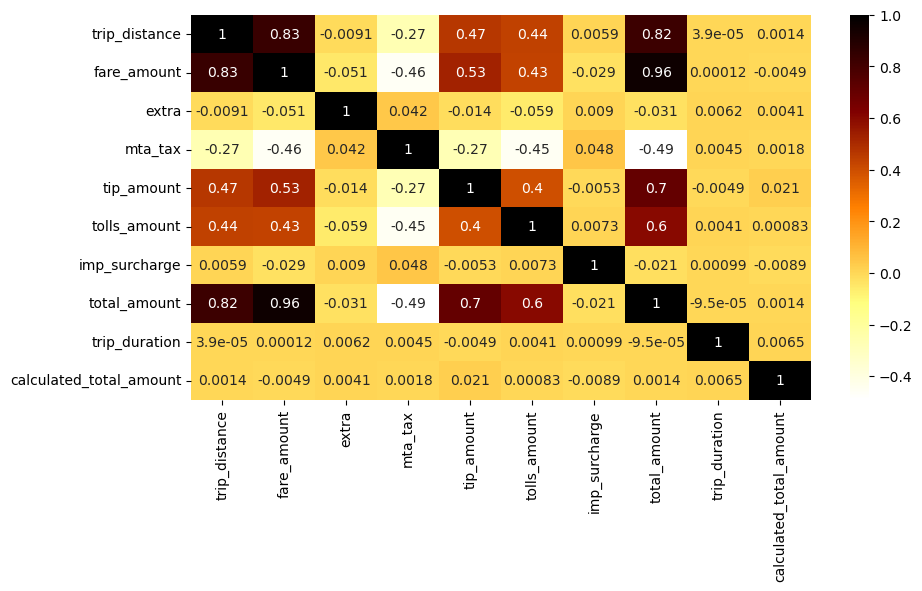

In [10]:
# check the correlation between the numerical vars
plt.figure(figsize=(10,5))
sns.heatmap(combined.loc[:,numeric_cols].corr(),annot=True, cmap='afmhot_r')
plt.show()

# Total Amoumt ~ Trip Distance ~ Fare Amount 

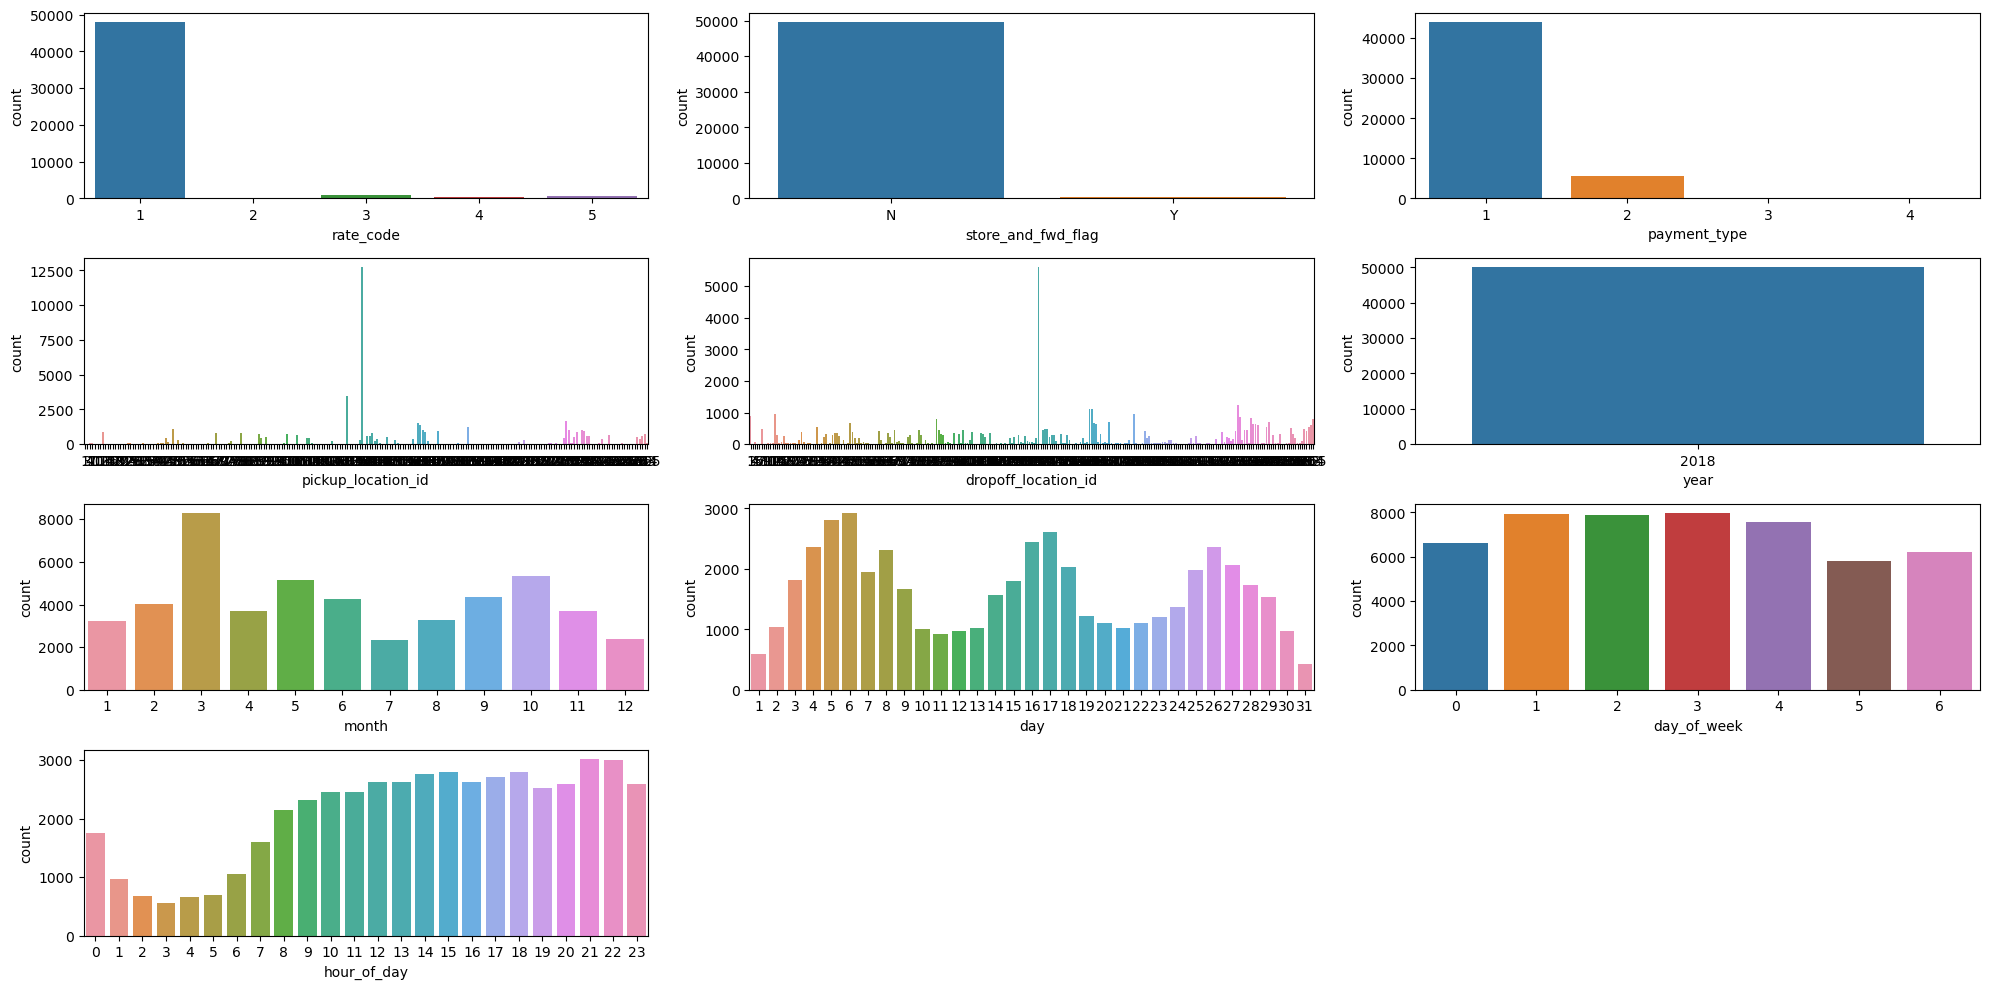

In [11]:
# Lets look into Cat Vars...

cat_cols = ['rate_code', 'store_and_fwd_flag', 'payment_type', 'pickup_location_id', 
           'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
           'hour_of_day']

nrows = 4
ncols = 3
iterator = 1

plt.figure(figsize=(20,10))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(combined.loc[:,i])
    iterator+=1
    
plt.tight_layout()
plt.show()

In [12]:
## Submit the base model....

submission['calulated_total_amount'] = train.calculated_total_amount.mean()

## Bivariate Analysis

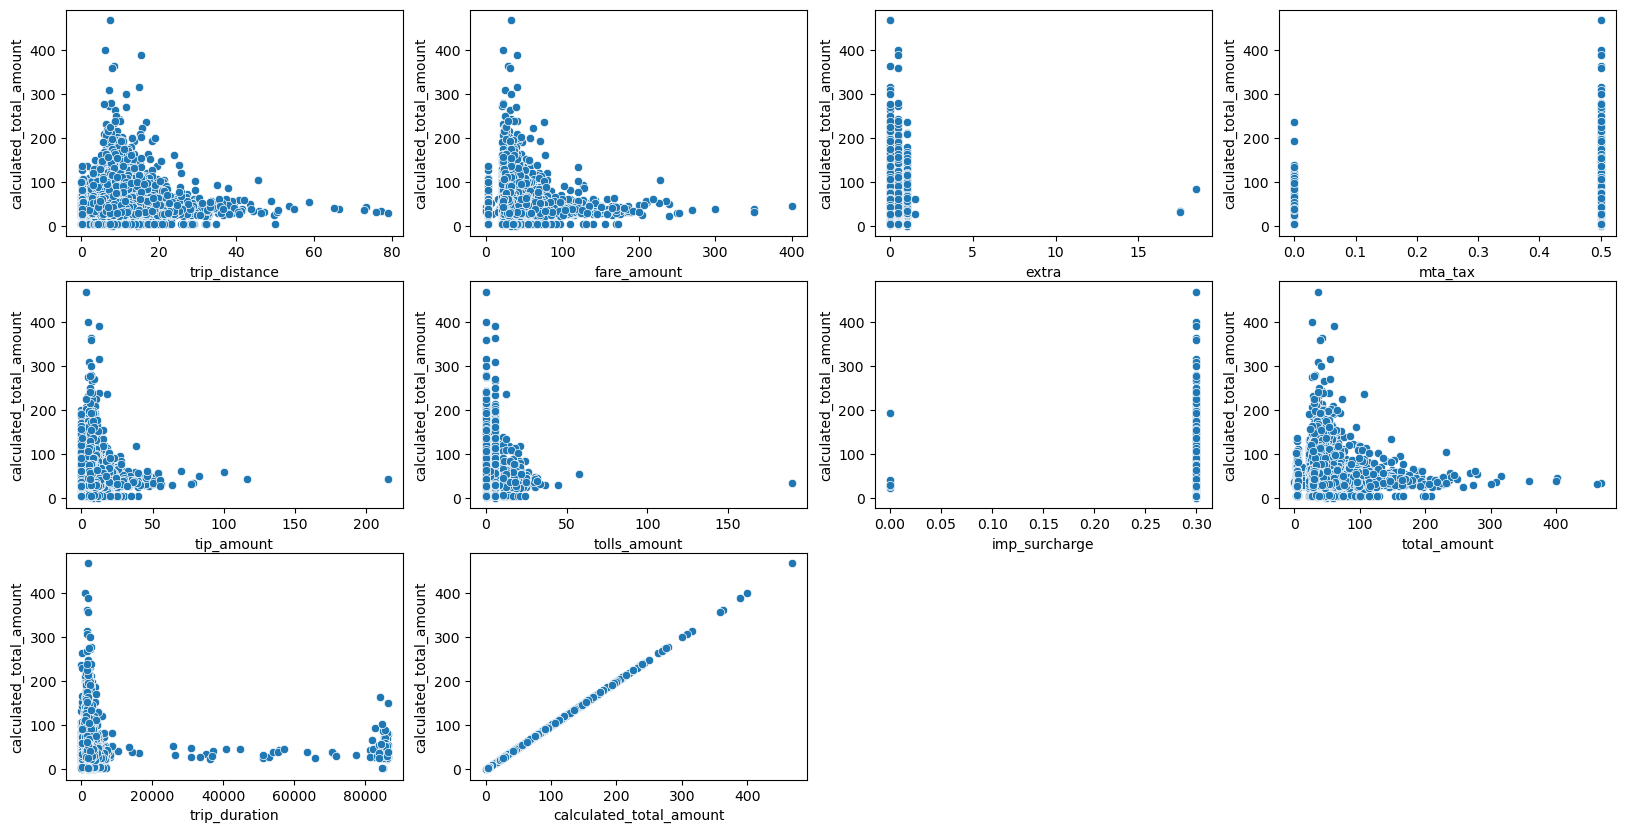

In [13]:

nrows=3
ncols=4
iterator=1

plt.figure(figsize=(20,10))
for i in numeric_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(combined.loc[:,i],combined.calculated_total_amount)
    iterator+=1
    
plt.tight_layout
plt.show()

Note:  We will have to remove the outliers in the Data

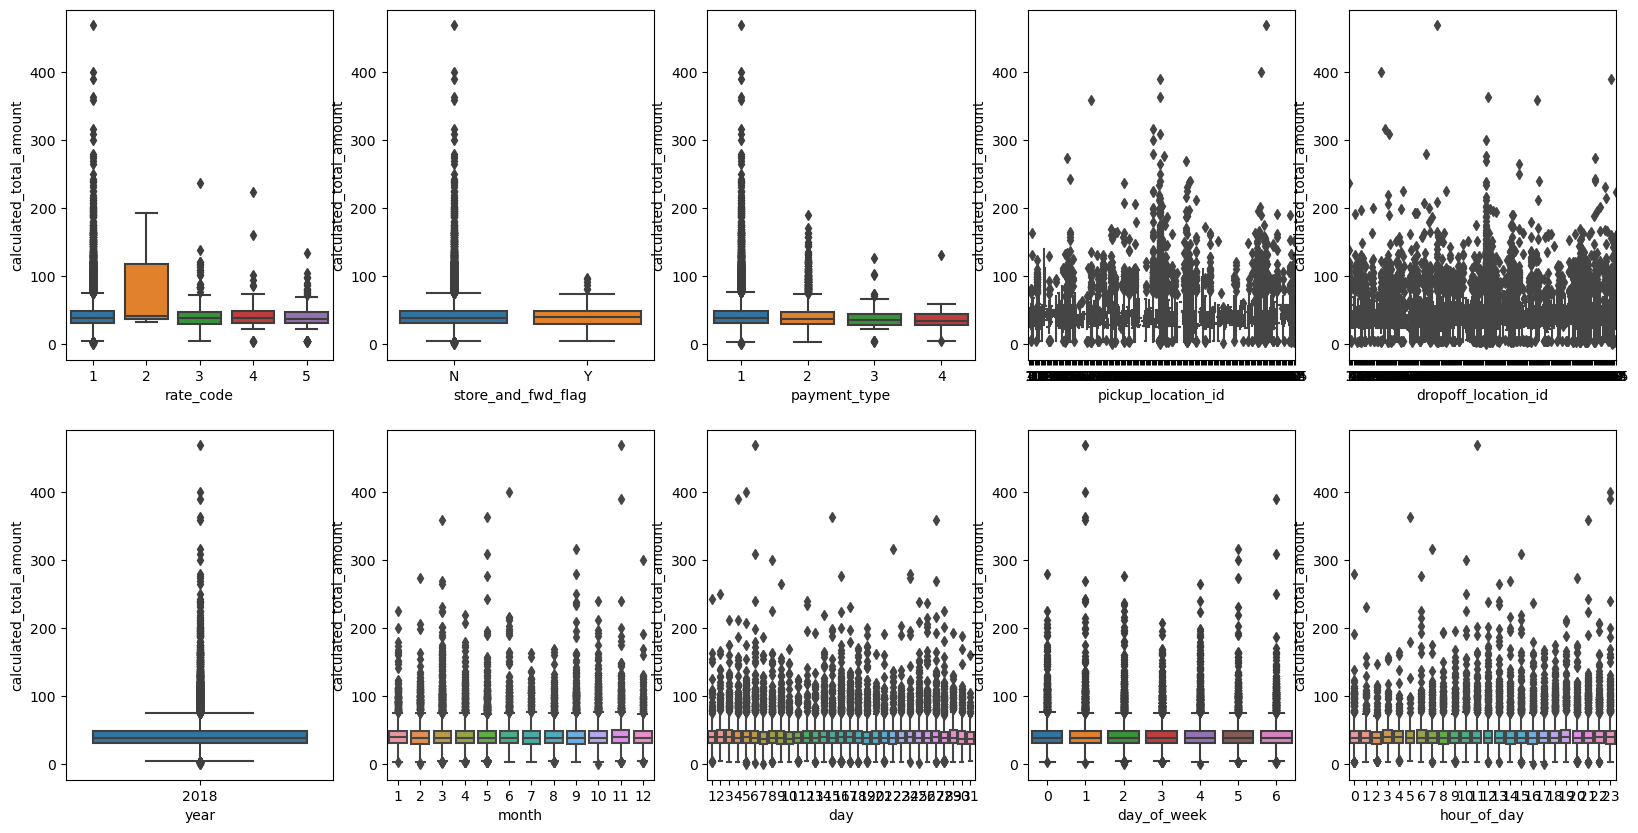

In [14]:
# Cat Vs Num

nrows=2
ncols=5
iterator=1

plt.figure(figsize=(20,10))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(combined.loc[:,i],combined.calculated_total_amount)
    iterator+=1
    
plt.tight_layout
plt.show()

In [15]:
# Lets check for the Missing values 

combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

## Fearture Engineering 

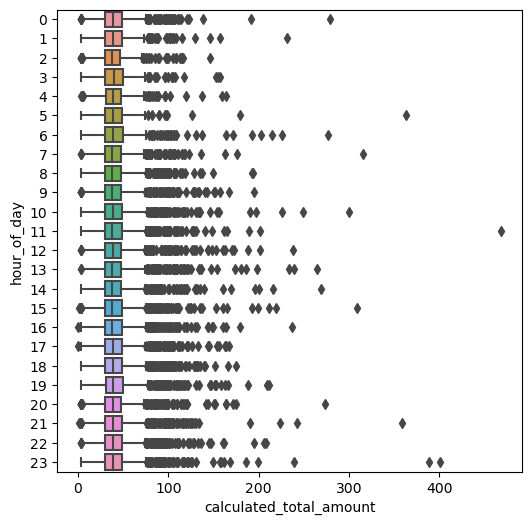

In [16]:
# Day of the Weeks
plt.figure(figsize=(6,6))
sns.boxplot(y = 'hour_of_day', x = 'calculated_total_amount', data= combined, orient='h')
plt.show()

In [17]:
# Busy Hours ..... Peak Hours 5, 10, 11, 15, 16, 19, 20, 21, 22, 23

combined['peak_hours'] = combined.hour_of_day.apply(lambda x:1 if x in [5,10,11,15,16,19,20,21,22,23] else 0)

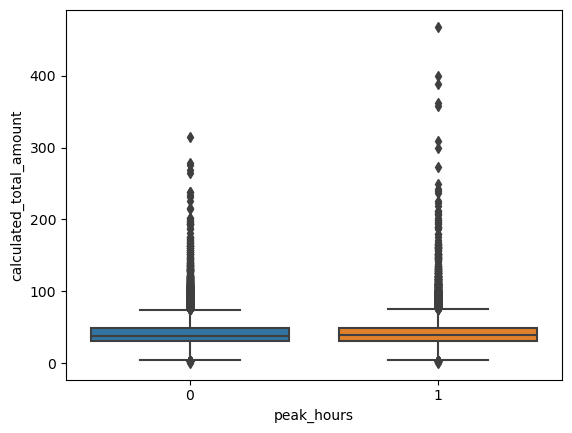

In [18]:
# Lets check if thes viriable has any pattern

sns.boxplot(x = 'peak_hours', y = 'calculated_total_amount', data= combined)
plt.show()

In [19]:
l1=[1,2,3,4,5,6]
l2=[7,8,9,10,11]
l3=[12,13,14,15,16]
l4 = [17,18,19,20,21,22,23,24]

def hours(x):
    if x in l1:
        return("Early Morning Hours")
    elif x in l2:
        return("Morning Hours")
    elif x in l3:
        return("AfterNoon")
    else:
        return("Return Hours")

In [20]:
combined["Hour"] = combined.hour_of_day.apply(hours)

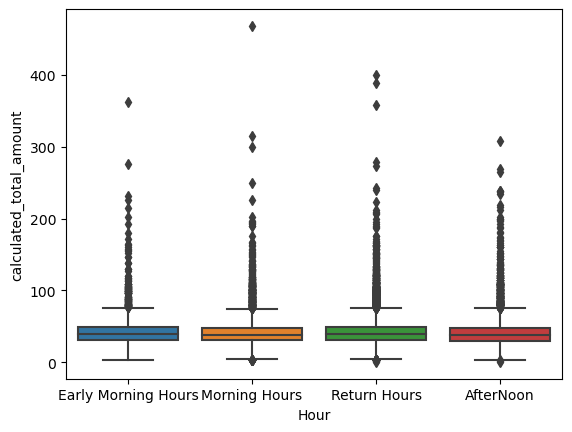

In [21]:
sns.boxplot(combined.Hour,combined.calculated_total_amount)
plt.show()

In [22]:
# Lets remove the Outliers from the Data

q1 = combined.quantile(0.25)
q3 = combined.quantile(0.75)

iqr = q3-q1

lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr

In [23]:
#combined.loc[~((combined<lower_lim) | (combined>upper_lim)).any(axis=1)].shape

In [24]:
# Clustering...
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state = 42)
elbow = KElbowVisualizer(estimator=kmeans, random_state = 42)

In [25]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'peak_hours',
       'Hour'],
      dtype='object')

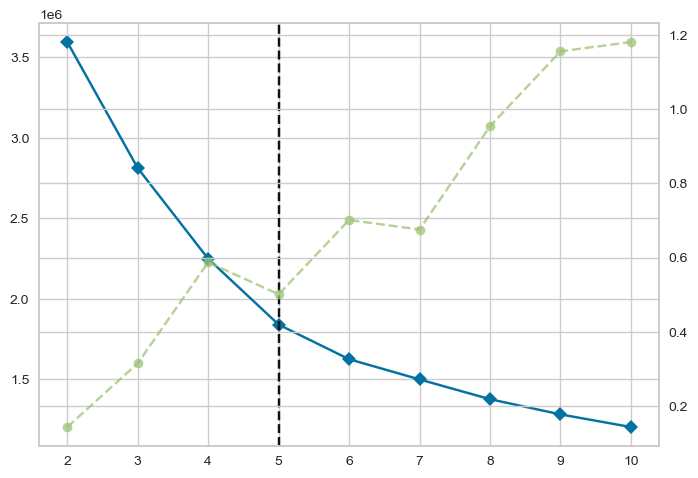

In [26]:
# Hours of the day, day of the week, month, day 

data = combined.loc[:, ['month', 'day', 'day_of_week', 'hour_of_day']]

# Fit the Elbow
elbow.fit(data)
plt.show()  # This gives me the number of clusters =5

In [27]:
# Fitting the clusters and generating the Labels.....
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit(data)

combined['cluster_lables'] = labels.labels_

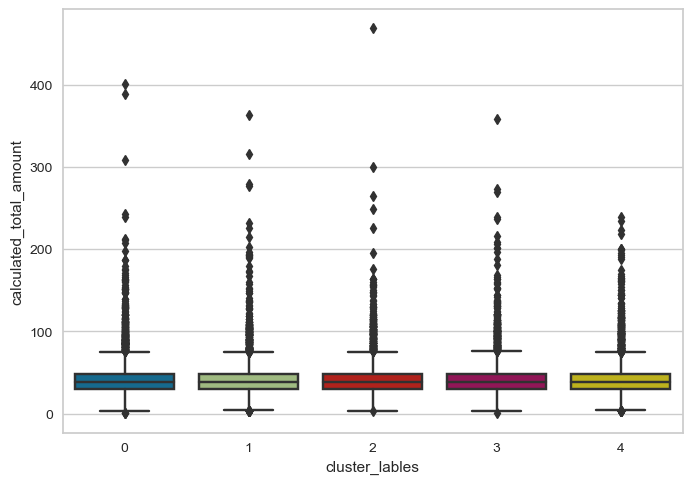

In [28]:
sns.boxplot(x='cluster_lables', y="calculated_total_amount", data= combined)
plt.show()

In [29]:
# pickup_location_id ~ dropoff_location_id

data = combined.loc[:, ['pickup_location_id', 'dropoff_location_id']]

# Fit the Elbow
elbow.fit(data)
plt.show()

In [30]:
# Fitting the clusters and generating the Labels.....
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit(data)

combined['geo_lables'] = labels.labels_

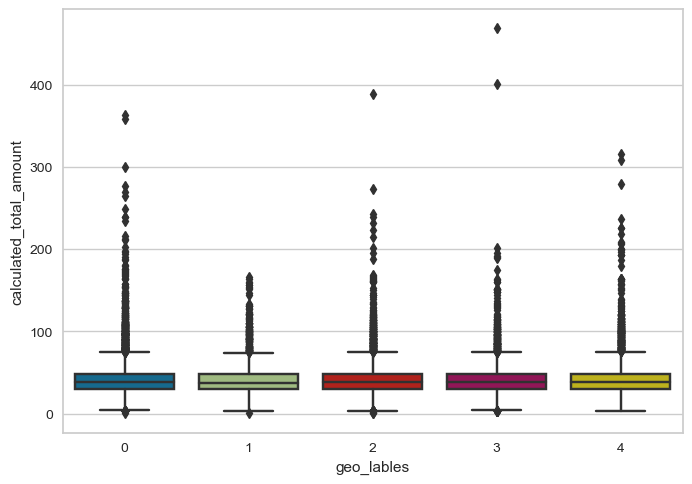

In [31]:
sns.boxplot(x='geo_lables', y="calculated_total_amount", data= combined)
plt.show()

In [32]:
# Lat and Longitude....

# 138~Queens, 132~Queens, 230~Manhattan, 161~Manhattan, 162~Manhattan,
combined.pickup_location_id.nunique()

224

In [33]:
manhattan_list = [4,12,13,24,41,42,43,45,48,50,68,74,75,79,87,88,90,100,
      103,104,105,107,113,114,116,120,125,127,128,137,140,141,
      142,143,144,148,151,152,153,158,161,162,163,164,166,170,186,
      194,202,209,211,224,229,230,231,232,233,234,236,237,238,239,243,244,246,249,261,262,263]

In [34]:
queen_list = [2,7,8,9,10,15,16,19,27,28,30,38,53,56,57,64,70,73,82,83,86,92,93,95,
96,98,101,102,117,121,122,124,129,130,131,132,134,135,138,139,145,146,157,
160,171,173,175,179,180,191,192,193,196,197,198,201,203,205,207,215,216,
218,219,223,226,252,253,258,260]

In [35]:
len(manhattan_list), len(queen_list)

(69, 69)

In [36]:
def locs(x):
    if x in manhattan_list:
        return("Manhattan")
    elif x in queen_list:
        return("Queens")
    else:
        return("Others")

In [37]:
combined['locations'] = combined.pickup_location_id.apply(locs)

In [38]:
combined['trip_count'] = combined.groupby('pickup_location_id')['dropoff_location_id'].transform('nunique')

In [39]:
# FARE PER DAY (mean , median , standard deviation)

combined["med_fare_pd"]= combined.groupby("day")["total_amount"].transform("median")

combined["mean_fare_pd"]= combined.groupby("day")["total_amount"].transform("mean")

combined["std_fare_pd"]= combined.groupby("day")["total_amount"].transform("std")


# MIN MAX per day

combined["min_fare_pd"]= combined.groupby("day")["total_amount"].transform("min")

combined["max_fare_pd"]= combined.groupby("day")["total_amount"].transform("max")



# FARE PER MONTH

combined["med_fare_pm"]= combined.groupby("month")["total_amount"].transform("median")

combined["mean_fare_pm"]= combined.groupby("month")["total_amount"].transform("mean")

combined["std_fare_pm"]= combined.groupby("month")["total_amount"].transform("std")


# MIN MAX per month

combined["min_fare_pm"]= combined.groupby("month")["total_amount"].transform("min")

combined["max_fare_pm"]= combined.groupby("month")["total_amount"].transform("max")

In [40]:
# SD Fare Per Month
combined['std_fare_pm'] = combined.groupby('month')['total_amount'].transform('std')

In [41]:
# Payment Type
combined.groupby('payment_type')['total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
payment_type,,,,,,,,
1,44109.0,42.729747,19.110126,3.30,31.00,39.67,49.27,468.35
2,5654.0,31.765354,16.861645,0.31,24.30,29.30,38.80,238.44
3,179.0,25.883799,21.345574,0.31,4.30,26.80,36.05,170.29
4,58.0,32.293276,28.497052,3.30,23.05,30.55,43.74,200.30


In [42]:
combined.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,peak_hours,Hour,cluster_lables,geo_lables,locations,trip_count,med_fare_pd,mean_fare_pd,std_fare_pd,min_fare_pd,max_fare_pd,med_fare_pm,mean_fare_pm,std_fare_pm,min_fare_pm,max_fare_pm
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.3,0,Early Morning Hours,2,3,Manhattan,74,37.30,41.038485,22.624294,3.30,389.12,39.56,42.229679,20.227974,3.3,400.80
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.4,1,Morning Hours,1,1,Manhattan,119,41.58,43.977707,17.755548,3.96,227.30,38.16,40.589817,18.533970,3.3,299.96


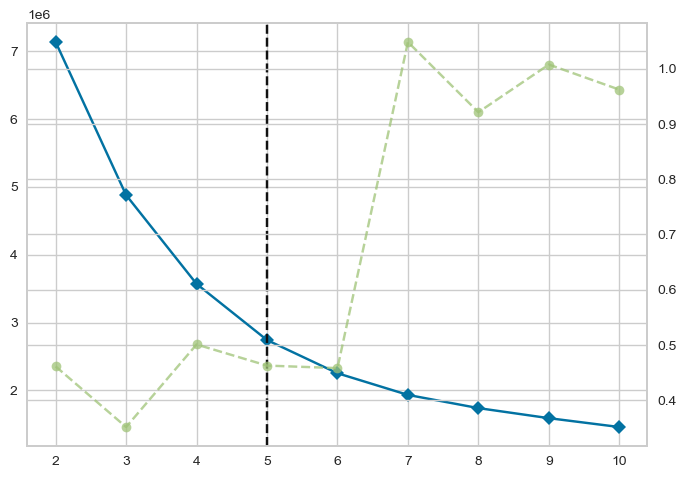

In [43]:
# Cluster Centroid for fare amount.....surcharge

kmeans = KMeans(random_state=42)
elbow = KElbowVisualizer(estimator = kmeans, random_state = 42)

data = combined.loc[:, ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge']]


elbow.fit(data)
plt.show()

In [44]:
# Fit the clusters ==3 and generate the centroids 
kmeans = KMeans(n_clusters = 3, random_state = 42)

centres = kmeans.fit(data)
combined['fare_centres'] = centres.labels_

In [45]:
import statsmodels.formula.api as sfa

model = sfa.ols("calculated_total_amount~fare_centres",
               data = combined).fit()

In [46]:
from statsmodels.stats.anova import anova_lm
print(anova_lm(model))

                   df        sum_sq     mean_sq         F    PR(>F)
fare_centres      1.0  1.497978e+02  149.797791  0.407744  0.523121
Residual      34998.0  1.285763e+07  367.381750       NaN       NaN


In [47]:
combined.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,peak_hours,Hour,cluster_lables,geo_lables,locations,trip_count,med_fare_pd,mean_fare_pd,std_fare_pd,min_fare_pd,max_fare_pd,med_fare_pm,mean_fare_pm,std_fare_pm,min_fare_pm,max_fare_pm,fare_centres
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.3,0,Early Morning Hours,2,3,Manhattan,74,37.30,41.038485,22.624294,3.30,389.12,39.56,42.229679,20.227974,3.3,400.80,1
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.4,1,Morning Hours,1,1,Manhattan,119,41.58,43.977707,17.755548,3.96,227.30,38.16,40.589817,18.533970,3.3,299.96,1


In [48]:
## DROP THE COLUMNS

newdata= combined.drop(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge',
       'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day'], axis=1)

In [49]:
# factorize the store and fwd flag
newdata['store_and_fwd_flag'] = pd.factorize(newdata.store_and_fwd_flag)[0]

In [50]:
# Split the Data in train and test
newtrain = newdata.loc[0:train.shape[0]-1, ]
newtest = newdata.loc[train.shape[0]:, ]

In [51]:
# Removing target from test
newtest.drop('calculated_total_amount', axis = 1, inplace=True)

In [52]:
# Lets remove the Outliers from the newtrain created..

q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)

iqr = q3-q1

lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr

In [56]:
newtrain.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,total_amount,trip_duration,calculated_total_amount,peak_hours,Hour,cluster_lables,geo_lables,locations,trip_count,med_fare_pd,mean_fare_pd,std_fare_pd,min_fare_pd,max_fare_pd,med_fare_pm,mean_fare_pm,std_fare_pm,min_fare_pm,max_fare_pm,fare_centres
0,9.01,1,0,1,40.70,2131.0,24.3,0,Early Morning Hours,2,3,Manhattan,74,37.30,41.038485,22.624294,3.30,389.12,39.56,42.229679,20.227974,3.3,400.80,1
1,0.20,1,0,1,4.55,2377.0,37.4,1,Morning Hours,1,1,Manhattan,119,41.58,43.977707,17.755548,3.96,227.30,38.16,40.589817,18.533970,3.3,299.96,1


In [58]:
# Eliminate the Outliers
wt_outliers = newtrain.loc[~((newtrain<lower_lim) | (newtrain>upper_lim)).any(axis = 1)]

In [59]:
# Split the Data in X and y 
X = wt_outliers.drop('calculated_total_amount', axis = 1)
y = wt_outliers.calculated_total_amount

In [60]:
## DEALING WITH MANHATTEN
X= pd.get_dummies(X,drop_first=True)
newtest= pd.get_dummies(newtest,drop_first=True)

## MODEL 

In [62]:
# IMPORTING THE LIBRARIEs

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

In [63]:
# Base Model

def base_models():
    
    models= dict()
    models["LR"]= LinearRegression()
    models["Dtree"]= DecisionTreeRegressor()
    models["RF"]= RandomForestRegressor()
    models["GBM"]= GradientBoostingRegressor()
    models["xgb"]= XGBRFRegressor()
    models["lgbm"]= LGBMRegressor()
    
    return models

In [64]:
from sklearn.model_selection import cross_val_score ,KFold


def eval_models(model):
    cv= KFold(n_splits= 5, shuffle= True , random_state= 42)
    score = cross_val_score(model, X=X , y=y,cv=cv ,scoring="neg_root_mean_squared_error",
                            error_score= "raise" , n_jobs = -1)
    return score

In [65]:
# BUILD THE MODEL
models= base_models()

results, names= list(), list()

for name, model in models.items():
    finalscore= eval_models(model)
    results.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name, np.mean(results), np.std(results)))

LR -12.345 (0.149)
Dtree -15.171 (2.830)
RF -14.303 (2.619)
GBM -13.814 (2.422)
xgb -13.521 (2.245)
lgbm -13.335 (2.092)
